# Training Classifier Vidmizer

<li>https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html</li>

# Classifier 2D Binaire vidmizer sur un Resnet
<p> Le code utilisé est celui de notre précédent classifier qui a été modifié </p>

## Loader

### Gestion de l'accès au drive / import des bibliothèques / Gestion de l'accès au GPU

In [ ]:
########## Accès au drive ########
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
########## Positionnement dans le repertoire ########
%cd /content/drive/MyDrive/TSP/HTI/PFE
#%cd /content/drive/MyDrive/PFE
!ls

/content/drive/MyDrive/TSP/HTI/PFE
API				resnet180.0001.pth	    resnet18_0.1_vidmizer.pth
API-Database			resnet180.0001tiktok.pth    resnet18_0.1_youtube.pth
Cascade.ipynb			resnet180.0001vidmizer.pth  test_tiktok
Classifier_2D_c_tiktok.ipynb	resnet180.001.pth	    test_vidmizer
Classifier_2D_c_vidmizer.ipynb	resnet180.001tiktok.pth     test_youtube
Classifier_2D_c_youtube.ipynb	resnet180.001vidmizer.pth   train_tiktok
Database_2D			resnet180.01.pth	    train_vidmizer
final_test			resnet180.01tiktok.pth	    train_youtube
Loader_2D_C.py			resnet180.01vidmizer.pth
__pycache__			resnet18_0.1_tiktok.pth


In [ ]:
###### Librairies #######
import os
import pandas as pd
from torchvision.io import read_image
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
#########################

In [ ]:
########## Gestion du GPU ###########
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # see if gpu is available
print('Using gpu: %s ' % torch.cuda.is_available())

Using gpu: True 


### Fonctions de Customisation de Dataset et de Loader

In [ ]:
########### Importation de la Classe Customisée ######
import sys
sys.path.append('Loader_2D_C.py')
print(sys.path)
from Loader_2D_C import CustomImageDataset

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', 'Loader_2D_C.py']


In [ ]:
################# Modification selon la classe  du RESNET #########@

########## Path ##########
dataset_2D = './train_vidmizer'
dataset_test_2D = './test_vidmizer'
annotation_test = dataset_test_2D + '/label_test_vidmizer.txt'
annotation = dataset_2D + '/label_train_vidmizer.txt'

Calcul de la mean et de la vairiance du dataset

In [ ]:
# Initialiser des variables pour accumuler les sommes et les sommes des carrés
sum_of_pixels = 0
sum_of_squares = 0
num_of_pixels = 0

# Parcourir le répertoire et charger chaque fichier .npy
for filename in os.listdir(dataset_2D):
    if filename.endswith('.npy'):
        filepath = os.path.join(dataset_2D, filename)
        data = np.load(filepath)  # Charger le fichier .npy

        # Accumuler les valeurs
        sum_of_pixels += np.sum(data)
        sum_of_squares += np.sum(data ** 2)
        num_of_pixels += data.size
        print(filepath)

# Calcul de la moyenne et de l'écart-type
mean = sum_of_pixels / num_of_pixels
std = np.sqrt((sum_of_squares / num_of_pixels) - (mean ** 2))
print()
print(f'Mean: {mean:.3f}, Std: {std:.3f}')

./train_vidmizer/tiktok_3_0.npy
./train_vidmizer/tiktok_2_7.npy
./train_vidmizer/tiktok_8_0.npy
./train_vidmizer/tiktok_7_3.npy
./train_vidmizer/tiktok_5_2.npy
./train_vidmizer/tiktok_4_2.npy
./train_vidmizer/tiktok_2_5.npy
./train_vidmizer/tiktok_5_5.npy
./train_vidmizer/tiktok_3_3.npy
./train_vidmizer/tiktok_6_2.npy
./train_vidmizer/tiktok_6_1.npy
./train_vidmizer/tiktok_2_1.npy
./train_vidmizer/tiktok_0_1.npy
./train_vidmizer/tiktok_4_8.npy
./train_vidmizer/tiktok_5_7.npy
./train_vidmizer/tiktok_6_4.npy
./train_vidmizer/tiktok_5_6.npy
./train_vidmizer/tiktok_4_3.npy
./train_vidmizer/tiktok_5_1.npy
./train_vidmizer/tiktok_2_2.npy
./train_vidmizer/tiktok_7_4.npy
./train_vidmizer/tiktok_3_1.npy
./train_vidmizer/tiktok_7_0.npy
./train_vidmizer/tiktok_6_5.npy
./train_vidmizer/tiktok_6_0.npy
./train_vidmizer/tiktok_4_6.npy
./train_vidmizer/tiktok_2_3.npy
./train_vidmizer/tiktok_4_4.npy
./train_vidmizer/tiktok_6_6.npy
./train_vidmizer/tiktok_6_3.npy
./train_vidmizer/tiktok_4_5.npy
./train_

In [ ]:
##### Image preprocessing #####
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(576, antialias=True),  # image batch, resize smaller edge to 576
        transforms.CenterCrop(576),  # image batch, center crop to square 576x576
        # transforms.Normalize(mean=[mean, mean, mean], std=[std, std, std])
])

In [ ]:
array = np.zeros((5, 5))
print(array.shape)
array2 = np.stack((array,)*3, axis=-1)
array3 = np.stack((array)*3, axis=0)
array4 = np.stack((array)*3, axis=1)
print(array2.shape, array3.shape, array4.shape)
print(array2)


(5, 5)
(5, 5, 3) (5, 5) (5, 5)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


### Instance des Datasets et Loaders

In [ ]:
############## Paramètre ################
batch_size = 64

############## Train Part ###############
train_set = CustomImageDataset(
    annotations_file = annotation,
    npy_dir = dataset_2D,
    transform=preprocess
)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

############## Test Part ################

test_set = CustomImageDataset(
    annotations_file = annotation_test,
    npy_dir = dataset_test_2D,
    transform=preprocess
)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=False, num_workers=2)



In [ ]:
sample_1 = train_set[0][0]
print(sample_1.shape)
print()
print(train_set[1])
print("max value : ", torch.max(sample_1), "min value : ", torch.min(sample_1))

torch.Size([3, 576, 576])

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 1)
max value :  tensor(8640.) min value :  tensor(-9568.)


### Try loader

torch.Size([3, 576, 576])


<function matplotlib.pyplot.show(close=None, block=None)>

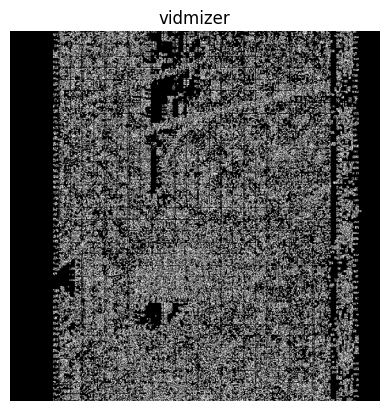

In [ ]:
###### Fonction d'affichage ######
def denormalize(img_tensor):
        inverse_normalize = transforms.Normalize(
            mean=[-mean/std, -mean/std, -mean/std],
            std=[1/std, 1/std, 1/std]
        )
        return (inverse_normalize(img_tensor) * 255.).type(torch.uint8).permute(1, 2, 0).numpy()

labels_map = {
    0: "vidmizer" ,
    1: "autre",
}

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

img = images[0]
label = labels[0]
print(img.size())

plt.title(labels_map[int(label.numpy())])
plt.axis("off")
plt.imshow(denormalize(img))
plt.show


## Classifier

### Define the Convolutional Neural Network ( Utilisation de ResNet )

In [ ]:
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm



In [ ]:
net = torchvision.models.resnet18(weights=None)
num_ftrs = net.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
net.fc = nn.Linear(num_ftrs, 2)

In [ ]:
print(net)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Define a Loss function and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10, 20], gamma=.1)

In [ ]:
num_class = 2

def quality_measurement(confusion_matrix):
    line_sum=torch.sum(confusion_matrix,dim=1)
    column_sum = torch.sum(confusion_matrix, dim=0)
    total_sum=torch.sum(confusion_matrix)
    Accuracy=torch.sum(torch.diag(confusion_matrix))/total_sum
    Precision=torch.diag(confusion_matrix)/line_sum
    Recall=torch.diag(confusion_matrix)/column_sum
    F1_score = 2 * (Precision * Recall)/(Precision+Recall)
    Pfa=(line_sum - torch.diag(confusion_matrix))/total_sum
    Pmd=(column_sum - torch.diag(confusion_matrix))/total_sum
    print("Accuracy : {}".format(Accuracy.item()))
    print("Precision 0 : {} - Precision 1 : {}".format(Precision[0],Precision[1]))
    print("Recall 0 : {} - Recall 1 : {}".format(Recall[0], Recall[1]))
    print("F1 score 0 : {} - F1 score 1 : {}".format(F1_score[0], F1_score[1]))
    print("Pfa 0 : {} - Pfa 1 : {}".format(Pfa[0], Pfa[1]))
    print("Pmd 0 : {} - Pmd 1 : {}".format(Pmd[0], Pmd[1]))
    return torch.nanmean(Accuracy),torch.nanmean(Precision),torch.nanmean(Recall),torch.nanmean(Recall),torch.nanmean(Pfa),torch.nanmean(Pmd)

def test_accuracy():
  net.eval()
  correct = 0
  total = 0
  confusion_matrix=torch.zeros((num_class,num_class),device=device)
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in test_loader:
          images, labels = data

          images = images.to(device)
          labels = labels.to(device)

          # calculate outputs by running images through the network
          outputs = net(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
          for i in range(len(labels)):
                label=int(labels[i])
                confusion_matrix[predicted[i],label]=confusion_matrix[predicted[i],label]+1
  net.train()
  print(quality_measurement(confusion_matrix))
  return  correct / total, confusion_matrix

In [ ]:
list_lr = [0.1]#, 0.01, 0.001, 0.0001]
loss_saveds=[]
accuracy_saveds=[]
test_accuracy_saveds=[]



for lr_v in list_lr :
  net = torchvision.models.resnet18(weights=None)
  num_ftrs = net.fc.in_features
  net.fc = nn.Linear(num_ftrs, 2)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=lr_v)
  scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10, 20], gamma=.1)
  net = net.to(device)
  loss_saved=[]
  accuracy_saved=[]
  test_accuracy_saved=[]


  for epoch in tqdm(range(50)):  # loop over the dataset multiple times

      running_loss = 0.0
      correct = 0
      total = 0
      for i, data in enumerate(train_loader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          inputs = inputs.to(device)
          labels = labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)

          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()


      loss_saved.append(running_loss/((i+1)*batch_size))
      accuracy_saved.append(correct / total)
      running_loss = 0.0
      scheduler.step()

      test_accuracy_val, matrice_confusion = test_accuracy()
      test_accuracy_saved.append(test_accuracy_val)

  print('Finished Training')
  print('Loss : ' , loss_saved)
  print('Accuracy : ' , accuracy_saved)
  print('Accuracy : ' , test_accuracy_saved)
  print( 'Matrice de confusion : ' , matrice_confusion)
  loss_saveds.append(loss_saved)
  accuracy_saveds.append(accuracy_saved)
  test_accuracy_saveds.append(test_accuracy_saved)
  PATH = f'./resnet18{lr_v}vidmizer.pth'
  torch.save(net.state_dict(), PATH)



  0%|          | 0/50 [00:00<?, ?it/s]

Accuracy : 0.4166666567325592
Precision 0 : 0.0 - Precision 1 : 0.4545454680919647
Recall 0 : 0.0 - Recall 1 : 0.8333333134651184
F1 score 0 : nan - F1 score 1 : 0.5882353186607361
Pfa 0 : 0.0833333358168602 - Pfa 1 : 0.5
Pmd 0 : 0.5 - Pmd 1 : 0.0833333358168602


  2%|▏         | 1/50 [00:39<32:26, 39.72s/it]

(tensor(0.4167, device='cuda:0'), tensor(0.2273, device='cuda:0'), tensor(0.4167, device='cuda:0'), tensor(0.4167, device='cuda:0'), tensor(0.2917, device='cuda:0'), tensor(0.2917, device='cuda:0'))


  4%|▍         | 2/50 [00:54<20:00, 25.01s/it]

Accuracy : 0.4722222089767456
Precision 0 : 0.4000000059604645 - Precision 1 : 0.4838709533214569
Recall 0 : 0.1111111119389534 - Recall 1 : 0.8333333134651184
F1 score 0 : 0.17391303181648254 - F1 score 1 : 0.6122449040412903
Pfa 0 : 0.0833333358168602 - Pfa 1 : 0.4444444477558136
Pmd 0 : 0.4444444477558136 - Pmd 1 : 0.0833333358168602
(tensor(0.4722, device='cuda:0'), tensor(0.4419, device='cuda:0'), tensor(0.4722, device='cuda:0'), tensor(0.4722, device='cuda:0'), tensor(0.2639, device='cuda:0'), tensor(0.2639, device='cuda:0'))


  6%|▌         | 3/50 [01:06<15:03, 19.22s/it]

Accuracy : 0.5
Precision 0 : 0.5 - Precision 1 : 0.5
Recall 0 : 0.2222222238779068 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.3076923191547394 - F1 score 1 : 0.6086956858634949
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.3888888955116272
Pmd 0 : 0.3888888955116272 - Pmd 1 : 0.1111111119389534
(tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.5000, device='cuda:0'), tensor(0.2500, device='cuda:0'), tensor(0.2500, device='cuda:0'))


  8%|▊         | 4/50 [01:18<12:24, 16.19s/it]

Accuracy : 0.6111111044883728
Precision 0 : 0.6666666865348816 - Precision 1 : 0.5833333134651184
Recall 0 : 0.4444444477558136 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.5333333015441895 - F1 score 1 : 0.6666666269302368
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.2777777910232544
Pmd 0 : 0.2777777910232544 - Pmd 1 : 0.1111111119389534
(tensor(0.6111, device='cuda:0'), tensor(0.6250, device='cuda:0'), tensor(0.6111, device='cuda:0'), tensor(0.6111, device='cuda:0'), tensor(0.1944, device='cuda:0'), tensor(0.1944, device='cuda:0'))


 10%|█         | 5/50 [01:28<10:34, 14.10s/it]

Accuracy : 0.7222222089767456
Precision 0 : 0.8999999761581421 - Precision 1 : 0.6538461446762085
Recall 0 : 0.5 - Recall 1 : 0.9444444179534912
F1 score 0 : 0.6428571343421936 - F1 score 1 : 0.7727272510528564
Pfa 0 : 0.02777777798473835 - Pfa 1 : 0.25
Pmd 0 : 0.25 - Pmd 1 : 0.02777777798473835
(tensor(0.7222, device='cuda:0'), tensor(0.7769, device='cuda:0'), tensor(0.7222, device='cuda:0'), tensor(0.7222, device='cuda:0'), tensor(0.1389, device='cuda:0'), tensor(0.1389, device='cuda:0'))


 12%|█▏        | 6/50 [01:42<10:20, 14.09s/it]

Accuracy : 0.6666666865348816
Precision 0 : 0.6875 - Precision 1 : 0.6499999761581421
Recall 0 : 0.6111111044883728 - Recall 1 : 0.7222222089767456
F1 score 0 : 0.6470587849617004 - F1 score 1 : 0.6842105388641357
Pfa 0 : 0.1388888955116272 - Pfa 1 : 0.1944444477558136
Pmd 0 : 0.1944444477558136 - Pmd 1 : 0.1388888955116272
(tensor(0.6667, device='cuda:0'), tensor(0.6687, device='cuda:0'), tensor(0.6667, device='cuda:0'), tensor(0.6667, device='cuda:0'), tensor(0.1667, device='cuda:0'), tensor(0.1667, device='cuda:0'))


 14%|█▍        | 7/50 [01:55<09:41, 13.53s/it]

Accuracy : 0.6388888955116272
Precision 0 : 0.6315789222717285 - Precision 1 : 0.6470588445663452
Recall 0 : 0.6666666865348816 - Recall 1 : 0.6111111044883728
F1 score 0 : 0.6486486196517944 - F1 score 1 : 0.6285714507102966
Pfa 0 : 0.1944444477558136 - Pfa 1 : 0.1666666716337204
Pmd 0 : 0.1666666716337204 - Pmd 1 : 0.1944444477558136
(tensor(0.6389, device='cuda:0'), tensor(0.6393, device='cuda:0'), tensor(0.6389, device='cuda:0'), tensor(0.6389, device='cuda:0'), tensor(0.1806, device='cuda:0'), tensor(0.1806, device='cuda:0'))


 16%|█▌        | 8/50 [02:06<09:05, 12.99s/it]

Accuracy : 0.8055555820465088
Precision 0 : 0.7200000286102295 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.6111111044883728
F1 score 0 : 0.8372093439102173 - F1 score 1 : 0.7586206793785095
Pfa 0 : 0.1944444477558136 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1944444477558136
(tensor(0.8056, device='cuda:0'), tensor(0.8600, device='cuda:0'), tensor(0.8056, device='cuda:0'), tensor(0.8056, device='cuda:0'), tensor(0.0972, device='cuda:0'), tensor(0.0972, device='cuda:0'))


 18%|█▊        | 9/50 [02:17<08:21, 12.23s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 20%|██        | 10/50 [02:30<08:13, 12.33s/it]

Accuracy : 0.8333333134651184
Precision 0 : 0.7727272510528564 - Precision 1 : 0.9285714030265808
Recall 0 : 0.9444444179534912 - Recall 1 : 0.7222222089767456
F1 score 0 : 0.8500000238418579 - F1 score 1 : 0.8125
Pfa 0 : 0.1388888955116272 - Pfa 1 : 0.02777777798473835
Pmd 0 : 0.02777777798473835 - Pmd 1 : 0.1388888955116272
(tensor(0.8333, device='cuda:0'), tensor(0.8506, device='cuda:0'), tensor(0.8333, device='cuda:0'), tensor(0.8333, device='cuda:0'), tensor(0.0833, device='cuda:0'), tensor(0.0833, device='cuda:0'))


 22%|██▏       | 11/50 [02:44<08:28, 13.05s/it]

Accuracy : 0.8055555820465088
Precision 0 : 0.7200000286102295 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.6111111044883728
F1 score 0 : 0.8372093439102173 - F1 score 1 : 0.7586206793785095
Pfa 0 : 0.1944444477558136 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1944444477558136
(tensor(0.8056, device='cuda:0'), tensor(0.8600, device='cuda:0'), tensor(0.8056, device='cuda:0'), tensor(0.8056, device='cuda:0'), tensor(0.0972, device='cuda:0'), tensor(0.0972, device='cuda:0'))


 24%|██▍       | 12/50 [02:55<07:53, 12.47s/it]

Accuracy : 0.8055555820465088
Precision 0 : 0.7200000286102295 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.6111111044883728
F1 score 0 : 0.8372093439102173 - F1 score 1 : 0.7586206793785095
Pfa 0 : 0.1944444477558136 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1944444477558136
(tensor(0.8056, device='cuda:0'), tensor(0.8600, device='cuda:0'), tensor(0.8056, device='cuda:0'), tensor(0.8056, device='cuda:0'), tensor(0.0972, device='cuda:0'), tensor(0.0972, device='cuda:0'))


 26%|██▌       | 13/50 [03:07<07:29, 12.15s/it]

Accuracy : 0.8055555820465088
Precision 0 : 0.7200000286102295 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.6111111044883728
F1 score 0 : 0.8372093439102173 - F1 score 1 : 0.7586206793785095
Pfa 0 : 0.1944444477558136 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1944444477558136
(tensor(0.8056, device='cuda:0'), tensor(0.8600, device='cuda:0'), tensor(0.8056, device='cuda:0'), tensor(0.8056, device='cuda:0'), tensor(0.0972, device='cuda:0'), tensor(0.0972, device='cuda:0'))


 28%|██▊       | 14/50 [03:20<07:24, 12.36s/it]

Accuracy : 0.8055555820465088
Precision 0 : 0.7200000286102295 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.6111111044883728
F1 score 0 : 0.8372093439102173 - F1 score 1 : 0.7586206793785095
Pfa 0 : 0.1944444477558136 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1944444477558136
(tensor(0.8056, device='cuda:0'), tensor(0.8600, device='cuda:0'), tensor(0.8056, device='cuda:0'), tensor(0.8056, device='cuda:0'), tensor(0.0972, device='cuda:0'), tensor(0.0972, device='cuda:0'))


 30%|███       | 15/50 [03:32<07:07, 12.22s/it]

Accuracy : 0.8055555820465088
Precision 0 : 0.7200000286102295 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.6111111044883728
F1 score 0 : 0.8372093439102173 - F1 score 1 : 0.7586206793785095
Pfa 0 : 0.1944444477558136 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1944444477558136
(tensor(0.8056, device='cuda:0'), tensor(0.8600, device='cuda:0'), tensor(0.8056, device='cuda:0'), tensor(0.8056, device='cuda:0'), tensor(0.0972, device='cuda:0'), tensor(0.0972, device='cuda:0'))


 32%|███▏      | 16/50 [03:43<06:44, 11.90s/it]

Accuracy : 0.8333333134651184
Precision 0 : 0.75 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.6666666865348816
F1 score 0 : 0.8571428656578064 - F1 score 1 : 0.800000011920929
Pfa 0 : 0.1666666716337204 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1666666716337204
(tensor(0.8333, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.8333, device='cuda:0'), tensor(0.8333, device='cuda:0'), tensor(0.0833, device='cuda:0'), tensor(0.0833, device='cuda:0'))


 34%|███▍      | 17/50 [03:54<06:29, 11.82s/it]

Accuracy : 0.8611111044883728
Precision 0 : 0.782608687877655 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7222222089767456
F1 score 0 : 0.8780487179756165 - F1 score 1 : 0.8387096524238586
Pfa 0 : 0.1388888955116272 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1388888955116272
(tensor(0.8611, device='cuda:0'), tensor(0.8913, device='cuda:0'), tensor(0.8611, device='cuda:0'), tensor(0.8611, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 36%|███▌      | 18/50 [04:07<06:27, 12.11s/it]

Accuracy : 0.8611111044883728
Precision 0 : 0.782608687877655 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7222222089767456
F1 score 0 : 0.8780487179756165 - F1 score 1 : 0.8387096524238586
Pfa 0 : 0.1388888955116272 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1388888955116272
(tensor(0.8611, device='cuda:0'), tensor(0.8913, device='cuda:0'), tensor(0.8611, device='cuda:0'), tensor(0.8611, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 38%|███▊      | 19/50 [04:19<06:15, 12.10s/it]

Accuracy : 0.8611111044883728
Precision 0 : 0.782608687877655 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7222222089767456
F1 score 0 : 0.8780487179756165 - F1 score 1 : 0.8387096524238586
Pfa 0 : 0.1388888955116272 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1388888955116272
(tensor(0.8611, device='cuda:0'), tensor(0.8913, device='cuda:0'), tensor(0.8611, device='cuda:0'), tensor(0.8611, device='cuda:0'), tensor(0.0694, device='cuda:0'), tensor(0.0694, device='cuda:0'))


 40%|████      | 20/50 [04:31<05:56, 11.89s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 42%|████▏     | 21/50 [04:45<06:02, 12.49s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 44%|████▍     | 22/50 [04:57<05:50, 12.52s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 46%|████▌     | 23/50 [05:09<05:30, 12.25s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 48%|████▊     | 24/50 [05:19<05:05, 11.73s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 50%|█████     | 25/50 [05:32<05:01, 12.06s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 52%|█████▏    | 26/50 [05:44<04:49, 12.08s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 54%|█████▍    | 27/50 [05:56<04:33, 11.89s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 56%|█████▌    | 28/50 [06:07<04:16, 11.64s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 58%|█████▊    | 29/50 [06:20<04:13, 12.06s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 60%|██████    | 30/50 [06:34<04:15, 12.76s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 62%|██████▏   | 31/50 [06:45<03:51, 12.20s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 64%|██████▍   | 32/50 [06:57<03:38, 12.14s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 66%|██████▌   | 33/50 [07:09<03:27, 12.24s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 68%|██████▊   | 34/50 [07:21<03:13, 12.11s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 70%|███████   | 35/50 [07:32<02:55, 11.67s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 72%|███████▏  | 36/50 [07:44<02:46, 11.88s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 74%|███████▍  | 37/50 [07:57<02:36, 12.08s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 76%|███████▌  | 38/50 [08:09<02:24, 12.04s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 78%|███████▊  | 39/50 [08:19<02:07, 11.61s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 80%|████████  | 40/50 [08:34<02:05, 12.51s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 82%|████████▏ | 41/50 [08:46<01:52, 12.47s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 84%|████████▍ | 42/50 [08:58<01:36, 12.11s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 86%|████████▌ | 43/50 [09:08<01:21, 11.69s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 88%|████████▊ | 44/50 [09:21<01:11, 11.97s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 90%|█████████ | 45/50 [09:33<00:59, 11.98s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 92%|█████████▏| 46/50 [09:44<00:47, 11.75s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 94%|█████████▍| 47/50 [09:55<00:34, 11.53s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 96%|█████████▌| 48/50 [10:08<00:23, 11.91s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


 98%|█████████▊| 49/50 [10:21<00:12, 12.25s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))


100%|██████████| 50/50 [10:32<00:00, 12.66s/it]

Accuracy : 0.8888888955116272
Precision 0 : 0.8181818127632141 - Precision 1 : 1.0
Recall 0 : 1.0 - Recall 1 : 0.7777777910232544
F1 score 0 : 0.9000000357627869 - F1 score 1 : 0.875
Pfa 0 : 0.1111111119389534 - Pfa 1 : 0.0
Pmd 0 : 0.0 - Pmd 1 : 0.1111111119389534
(tensor(0.8889, device='cuda:0'), tensor(0.9091, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.8889, device='cuda:0'), tensor(0.0556, device='cuda:0'), tensor(0.0556, device='cuda:0'))
Finished Training
Loss :  [0.009871570859104395, 0.006635423904905717, 0.006865509475270907, 0.005635182062784831, 0.0051387435135742026, 0.00542402034625411, 0.004591084240625302, 0.004125573517133792, 0.003279623265067736, 0.004165844099285702, 0.0022048166332145533, 0.0020314761980747185, 0.0018408979910115402, 0.0018979692443584402, 0.0023198837491994104, 0.0017453510857497652, 0.0016756959181899826, 0.0020147290003175535, 0.0015082854855184753, 0.0016166620577375095, 0.0017644126589099567, 0.001677053941724201, 0.001666625418

### Print de la loss en fonction des epochs

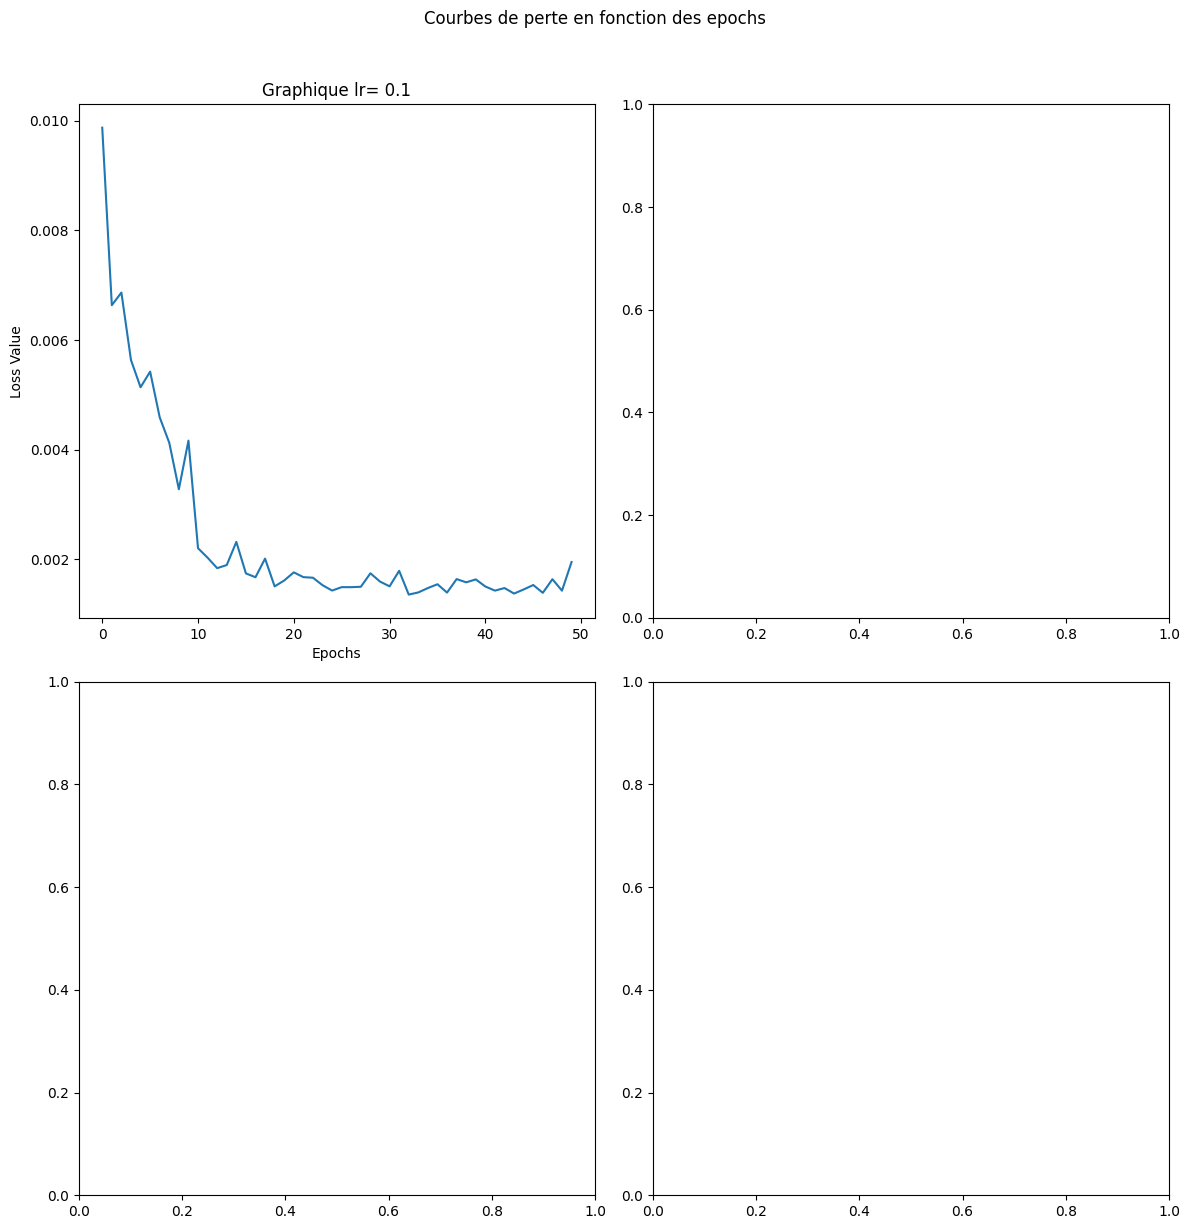

In [ ]:
import matplotlib.pyplot as plt

# Création d'une grille pour afficher les graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 6 * 2))
fig.suptitle('Courbes de perte en fonction des epochs', y=1.02)  # Titre global

# Affichage des courbes dans la grille
for i, loss_saved in enumerate(loss_saveds):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    ax.plot(loss_saved)

    # Ajout de titres aux axes pour chaque sous-plot
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss Value')
    ax.set_title(f'Graphique lr= {list_lr[i]}')

# Ajustement de l'espacement entre les sous-plots
plt.tight_layout()

# Affichage de la grille
plt.show()

### Print de l'accuracy en fonction des epochs

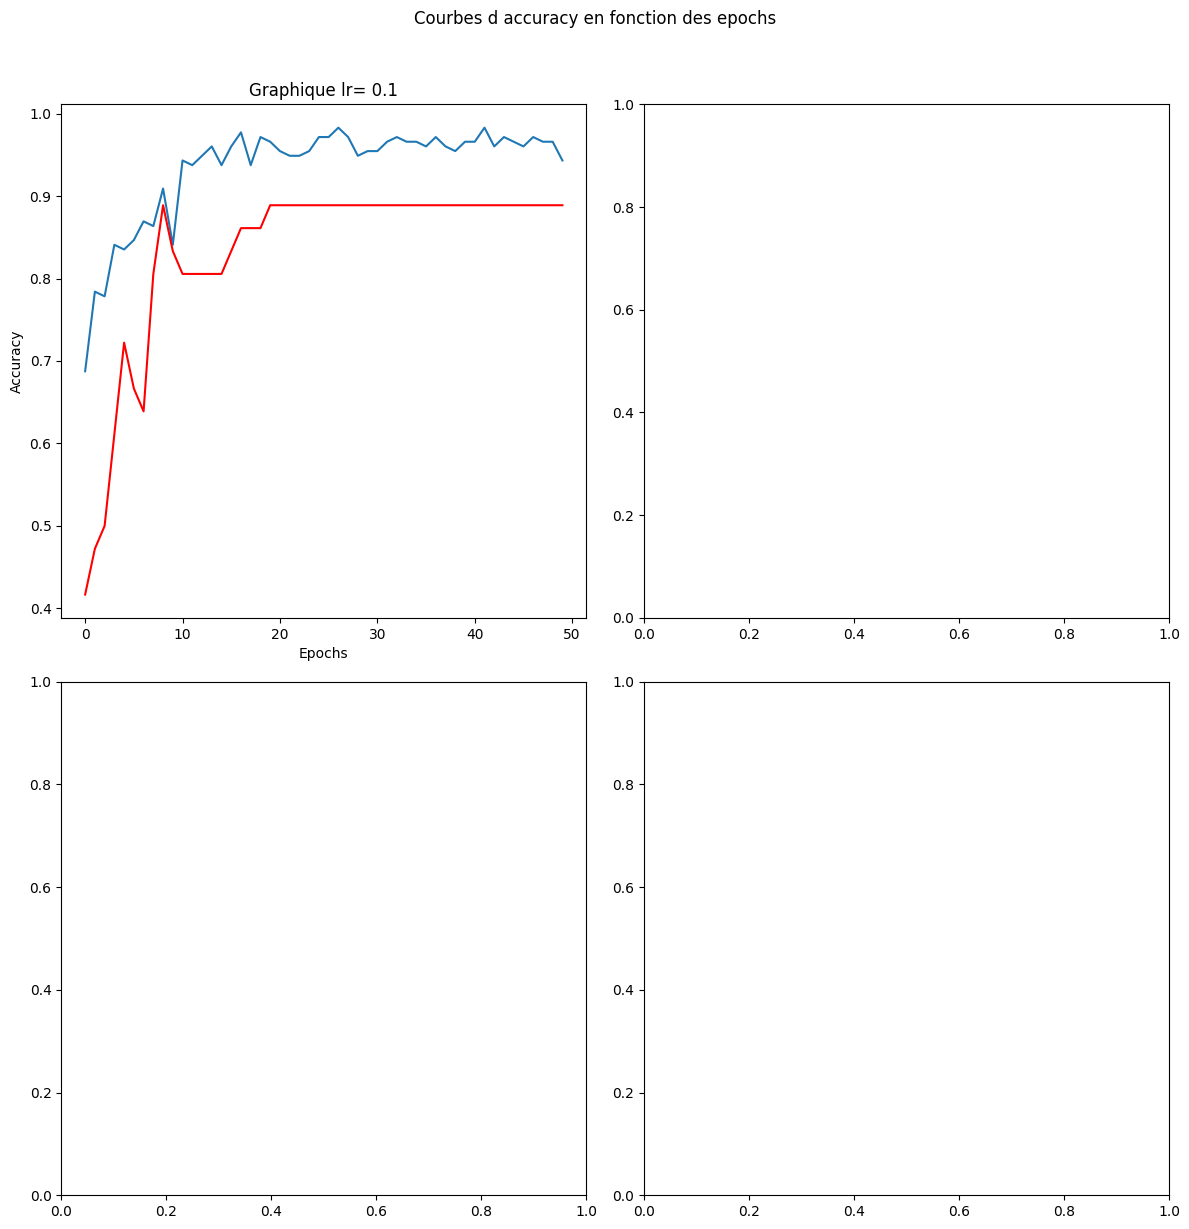

In [ ]:
# Création d'une grille pour afficher les graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 6 * 2))
fig.suptitle('Courbes d accuracy en fonction des epochs', y=1.02)  # Titre global

# Affichage des courbes dans la grille
for i, accuracy_saved in enumerate(accuracy_saveds):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    ax.plot(accuracy_saved,label='train')
    ax.plot(test_accuracy_saveds[i],color='r',label='test')

    # Ajout de titres aux axes pour chaque sous-plot
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Graphique lr= {list_lr[i]}')

# Ajustement de l'espacement entre les sous-plots
plt.tight_layout()

# Affichage de la grille
plt.show()

### Test the network on the test data

#### First test on one frame

In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

images = images.to(device)
labels = labels.to(device)

img = images[0].cpu()  # Copie le tensor sur le CPU
label = labels[0].cpu()  # Copie le tensor sur le CPU

print(img.size())

plt.title(labels_map[int(label.numpy())])
plt.axis("off")
plt.imshow(denormalize(img))
plt.show

torch.Size([3, 576, 576])


NameError: name 'labels_map' is not defined

In [ ]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

In [ ]:
predicted = predicted.cpu()  # Copie le tensor sur le CPU
print(labels_map[int(predicted[0].numpy())])


NameError: name 'labels_map' is not defined

#### Let us look at how the network performs on the whole dataset

#### Result by class

In [ ]:
classes = ('vidmizer','autre')
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)  # Copie les images sur le GPU
        labels = labels.to(device)  # Copie les étiquettes sur le GPU
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: vidmizer is 94.4 %
Accuracy for class: autre is 77.8 %
